In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [3]:
country = []
cloudiness = []
temp = []
humidity = []
wind = []
lat = []
lng = []

cities_pd = pd.DataFrame({"Cities": cities})
cities_pd["Country"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Temp"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd.head()


,Cities,Country,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,ushuaia,,,,,,,
1,tuatapere,,,,,,,
2,dombarovskiy,,,,,,,
3,illoqqortoormiut,,,,,,,
4,lebu,,,,,,,


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
units = "Imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

count = 0
Number_cities = len(cities)
for city in cities:
    query_url = f'{url}appid={api_key}&units={units}&q={city}'
    cities_data = requests.get(query_url).json()
    print(f'city {count} of {Number_cities} | {city}')
    print(f'Extracting {query_url}')
    count = count + 1
    print('------------------------')     
       
    try:      
        country.append(cities_data["sys"]["country"])
        lat.append(cities_data["coord"]["lat"])
        lng.append(cities_data["coord"]["lon"])
        temp.append(cities_data["main"]["temp"])
        humidity.append(cities_data["main"]["humidity"])
        cloudiness.append(cities_data["clouds"]["all"])
        wind.append(cities_data["wind"]["speed"])
         
    except: 
        print("City not Found")
print("extracted all data")

city 0 of 619 | ushuaia
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=ushuaia
------------------------
city 1 of 619 | tuatapere
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=tuatapere
------------------------
city 2 of 619 | dombarovskiy
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=dombarovskiy
------------------------
city 3 of 619 | illoqqortoormiut
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=illoqqortoormiut
------------------------
City not Found
city 4 of 619 | lebu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=lebu
------------------------
city 5 of 619 | busselton
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b236

city 47 of 619 | huicheng
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=huicheng
------------------------
city 48 of 619 | qaanaaq
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=qaanaaq
------------------------
city 49 of 619 | verkhnevilyuysk
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=verkhnevilyuysk
------------------------
city 50 of 619 | usolye
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=usolye
------------------------
city 51 of 619 | olafsvik
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=olafsvik
------------------------
City not Found
city 52 of 619 | antofagasta
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b236

city 94 of 619 | mezhdurechensk
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=mezhdurechensk
------------------------
city 95 of 619 | atuona
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=atuona
------------------------
city 96 of 619 | kainantu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=kainantu
------------------------
city 97 of 619 | port lincoln
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=port lincoln
------------------------
city 98 of 619 | samusu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=samusu
------------------------
City not Found
city 99 of 619 | mayo
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b4

city 141 of 619 | margate
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=margate
------------------------
city 142 of 619 | belushya guba
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=belushya guba
------------------------
City not Found
city 143 of 619 | elizabeth city
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=elizabeth city
------------------------
city 144 of 619 | quatre cocos
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=quatre cocos
------------------------
city 145 of 619 | saint george
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=saint george
------------------------
city 146 of 619 | alofi
Extracting http://api.openweathermap.org/data/2.5/

city 188 of 619 | kaz
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=kaz
------------------------
city 189 of 619 | mountrath
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=mountrath
------------------------
city 190 of 619 | rovinj
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=rovinj
------------------------
city 191 of 619 | buraydah
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=buraydah
------------------------
city 192 of 619 | grand gaube
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=grand gaube
------------------------
city 193 of 619 | calatayud
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=

city 236 of 619 | atkarsk
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=atkarsk
------------------------
city 237 of 619 | beringovskiy
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=beringovskiy
------------------------
city 238 of 619 | sinkat
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=sinkat
------------------------
City not Found
city 239 of 619 | sibolga
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=sibolga
------------------------
city 240 of 619 | werda
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=werda
------------------------
city 241 of 619 | ugoofaaru
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267

city 284 of 619 | cockburn town
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=cockburn town
------------------------
city 285 of 619 | khatanga
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=khatanga
------------------------
city 286 of 619 | ha tinh
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=ha tinh
------------------------
city 287 of 619 | anadyr
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=anadyr
------------------------
city 288 of 619 | non sang
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=non sang
------------------------
city 289 of 619 | ardakan
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb5

city 332 of 619 | mount isa
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=mount isa
------------------------
city 333 of 619 | brae
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=brae
------------------------
city 334 of 619 | wolbrom
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=wolbrom
------------------------
city 335 of 619 | nouadhibou
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=nouadhibou
------------------------
city 336 of 619 | kuche
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=kuche
------------------------
City not Found
city 337 of 619 | cumaru
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb5

city 379 of 619 | kudat
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=kudat
------------------------
city 380 of 619 | vostok
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=vostok
------------------------
city 381 of 619 | abu dhabi
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=abu dhabi
------------------------
city 382 of 619 | nanortalik
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=nanortalik
------------------------
city 383 of 619 | provideniya
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=provideniya
------------------------
city 384 of 619 | belmonte
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56

city 427 of 619 | zhirnov
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=zhirnov
------------------------
city 428 of 619 | pacific grove
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=pacific grove
------------------------
city 429 of 619 | san patricio
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=san patricio
------------------------
city 430 of 619 | karaul
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=karaul
------------------------
City not Found
city 431 of 619 | besikduzu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=besikduzu
------------------------
city 432 of 619 | embu-guacu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3

city 473 of 619 | shubarkuduk
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=shubarkuduk
------------------------
city 474 of 619 | pokhara
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=pokhara
------------------------
city 475 of 619 | xining
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=xining
------------------------
city 476 of 619 | marshfield
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=marshfield
------------------------
city 477 of 619 | ocos
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=ocos
------------------------
city 478 of 619 | sassandra
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&unit

city 521 of 619 | joacaba
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=joacaba
------------------------
city 522 of 619 | khao yoi
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=khao yoi
------------------------
city 523 of 619 | greenville
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=greenville
------------------------
city 524 of 619 | namatanai
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=namatanai
------------------------
city 525 of 619 | tura
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=tura
------------------------
city 526 of 619 | adelaide
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units

city 568 of 619 | matara
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=matara
------------------------
city 569 of 619 | khandyga
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=khandyga
------------------------
city 570 of 619 | biu
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=biu
------------------------
city 571 of 619 | saiha
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=saiha
------------------------
city 572 of 619 | nerchinskiy zavod
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=nerchinskiy zavod
------------------------
city 573 of 619 | uwayl
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=

city 616 of 619 | kochki
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=kochki
------------------------
city 617 of 619 | miranorte
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=miranorte
------------------------
City not Found
city 618 of 619 | soria
Extracting http://api.openweathermap.org/data/2.5/weather?appid=2f3ca35607b2369b49af0267aa3ceb56&units=Imperial&q=soria
------------------------
extracted all data


In [5]:
#country = (cities_data["sys"]["country"])
#lat = (cities_data["coord"]["lat"])
#lng = (cities_data["coord"]["lon"])
#temp = (cities_data["main"]["temp"])
#humidity = (cities_data["main"]["humidity"])
#cloudiness = (cities_data["clouds"]["all"])
#wind = (cities_data["wind"]["speed"])

for index, row in cities_pd.iterrows():
    cities_pd.at[index, "Country"] = country
    #(cities_data["sys"]["country"])
    cities_pd.at[index, "Lat"] = lat
    #(cities_data["coord"]["lat"])
    cities_pd.at[index, "Lng"] = lng
    #(cities_data["coord"]["lon"])
    cities_pd.at[index, "Temp"] = temp
    #(cities_data["main"]["temp"])
    cities_pd.at[index, "Humidity"] = humidity
    #(cities_data["main"]["humidity"])
    cities_pd.at[index, "Cloudiness"] = cloudiness
    #(cities_data["clouds"]["all"])
    cities_pd.at[index, "Wind Speed"] = wind
    #(cities_data["wind"]["speed"])

cities_pd.head()

,Cities,Country,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,ushuaia,"[AR, NZ, RU, ET, AU, ID, MV, AU, EC, CL, RU, A...","[-54.81, -46.13, 50.76, 8.96, -33.64, -0.92, 3...","[-68.31, 167.69, 59.54, 38.73, 115.35, 100.36,...","[30.85, 44.9, 91.07, 61.46, 56.24, 78.65, 85.1...","[80, 100, 26, 80, 100, 100, 97, 60, 87, 87, 95...","[40, 64, 0, 80, 0, 12, 80, 0, 56, 0, 88, 20, 0...","[2.37, 7.63, 9.64, 2.37, 10.42, 2.37, 13.78, 7..."
1,tuatapere,"[AR, NZ, RU, ET, AU, ID, MV, AU, EC, CL, RU, A...","[-54.81, -46.13, 50.76, 8.96, -33.64, -0.92, 3...","[-68.31, 167.69, 59.54, 38.73, 115.35, 100.36,...","[30.85, 44.9, 91.07, 61.46, 56.24, 78.65, 85.1...","[80, 100, 26, 80, 100, 100, 97, 60, 87, 87, 95...","[40, 64, 0, 80, 0, 12, 80, 0, 56, 0, 88, 20, 0...","[2.37, 7.63, 9.64, 2.37, 10.42, 2.37, 13.78, 7..."
2,dombarovskiy,"[AR, NZ, RU, ET, AU, ID, MV, AU, EC, CL, RU, A...","[-54.81, -46.13, 50.76, 8.96, -33.64, -0.92, 3...","[-68.31, 167.69, 59.54, 38.73, 115.35, 100.36,...","[30.85, 44.9, 91.07, 61.46, 56.24, 78.65, 85.1...","[80, 100, 26, 80, 100, 100, 97, 60, 87, 87, 95...","[40, 64, 0, 80, 0, 12, 80, 0, 56, 0, 88, 20, 0...","[2.37, 7.63, 9.64, 2.37, 10.42, 2.37, 13.78, 7..."
3,illoqqortoormiut,"[AR, NZ, RU, ET, AU, ID, MV, AU, EC, CL, RU, A...","[-54.81, -46.13, 50.76, 8.96, -33.64, -0.92, 3...","[-68.31, 167.69, 59.54, 38.73, 115.35, 100.36,...","[30.85, 44.9, 91.07, 61.46, 56.24, 78.65, 85.1...","[80, 100, 26, 80, 100, 100, 97, 60, 87, 87, 95...","[40, 64, 0, 80, 0, 12, 80, 0, 56, 0, 88, 20, 0...","[2.37, 7.63, 9.64, 2.37, 10.42, 2.37, 13.78, 7..."
4,lebu,"[AR, NZ, RU, ET, AU, ID, MV, AU, EC, CL, RU, A...","[-54.81, -46.13, 50.76, 8.96, -33.64, -0.92, 3...","[-68.31, 167.69, 59.54, 38.73, 115.35, 100.36,...","[30.85, 44.9, 91.07, 61.46, 56.24, 78.65, 85.1...","[80, 100, 26, 80, 100, 100, 97, 60, 87, 87, 95...","[40, 64, 0, 80, 0, 12, 80, 0, 56, 0, 88, 20, 0...","[2.37, 7.63, 9.64, 2.37, 10.42, 2.37, 13.78, 7..."


In [39]:
print(cities_data)

{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.16, 'pressure': 1015, 'humidity': 69, 'temp_min': 78.8, 'temp_max': 82.4}, 'visibility': 16093, 'wind': {'speed': 23.04, 'deg': 40, 'gust': 13.4}, 'clouds': {'all': 75}, 'dt': 1531014960, 'sys': {'type': 1, 'id': 823, 'message': 0.0206, 'country': 'US', 'sunrise': 1531065052, 'sunset': 1531113066}, 'id': 5847411, 'name': 'Kahului', 'cod': 200}


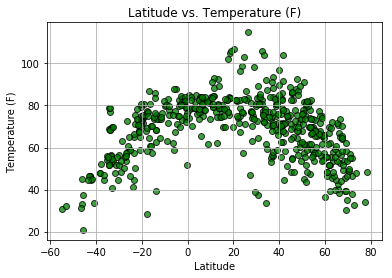

In [6]:
#Lat vs Temp
plt.scatter(lat, temp, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

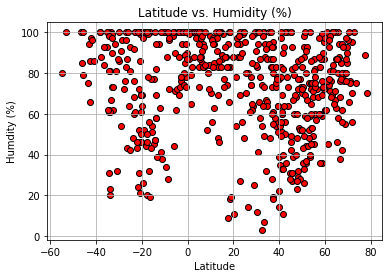

In [7]:
#Lat vs Humidity
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Humidity (%)")
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid()

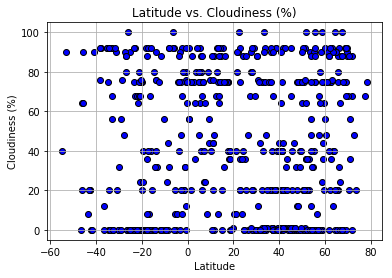

In [8]:
#Lat vs Cloudiness
plt.scatter(lat, cloudiness, marker="o", facecolor="blue", edgecolor="black")
plt.title("Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

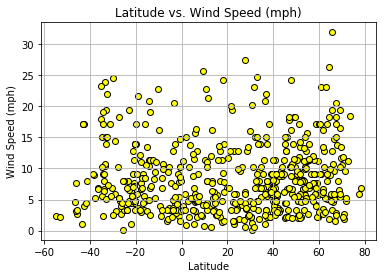

In [9]:
#Lat vs Wind Speed
plt.scatter(lat, wind, marker="o", facecolor="yellow", edgecolor="black")
plt.title("Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
